In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

# metadata
print(iris.metadata)

# variable information
print(iris.variables)


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'}, 'add

In [ ]:
# prompt: how to find the dimensions of the dataset

X.shape


(150, 4)

In [ ]:
# prompt: how do I display the data in the dataset?

X.head()


,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# prompt: how to find the Statistical summary of all attributes?

X.describe()


,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# prompt: Breakdown of the data by the class variable

y.value_counts()


,count
class,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


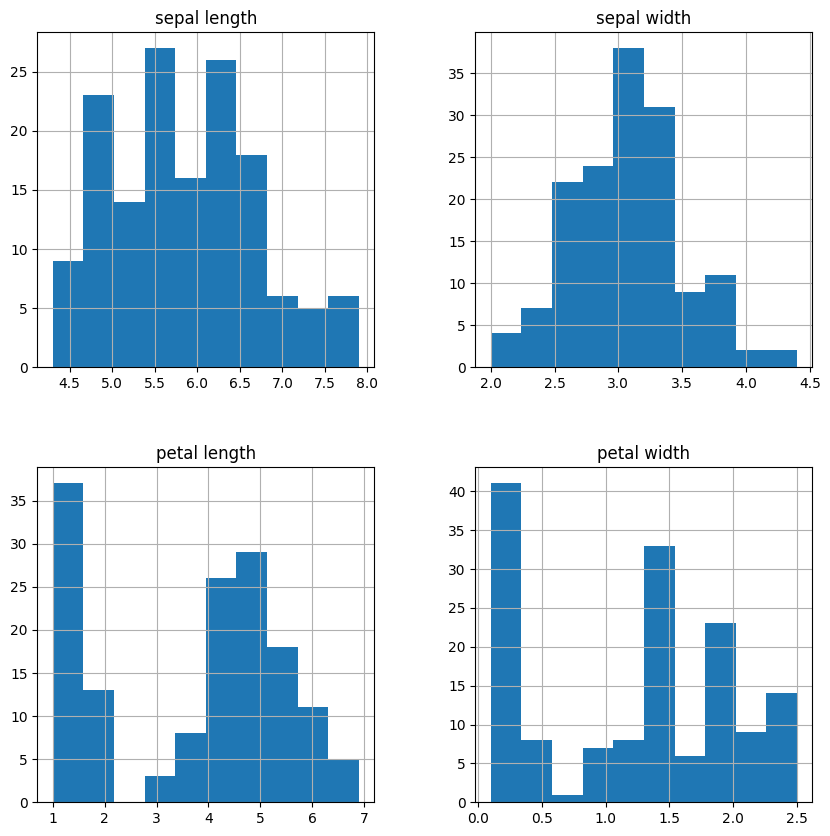

In [ ]:
# prompt: •	Univariate plots to better understand each attribute

import matplotlib.pyplot as plt

X.hist(figsize=(10, 10))
plt.show()


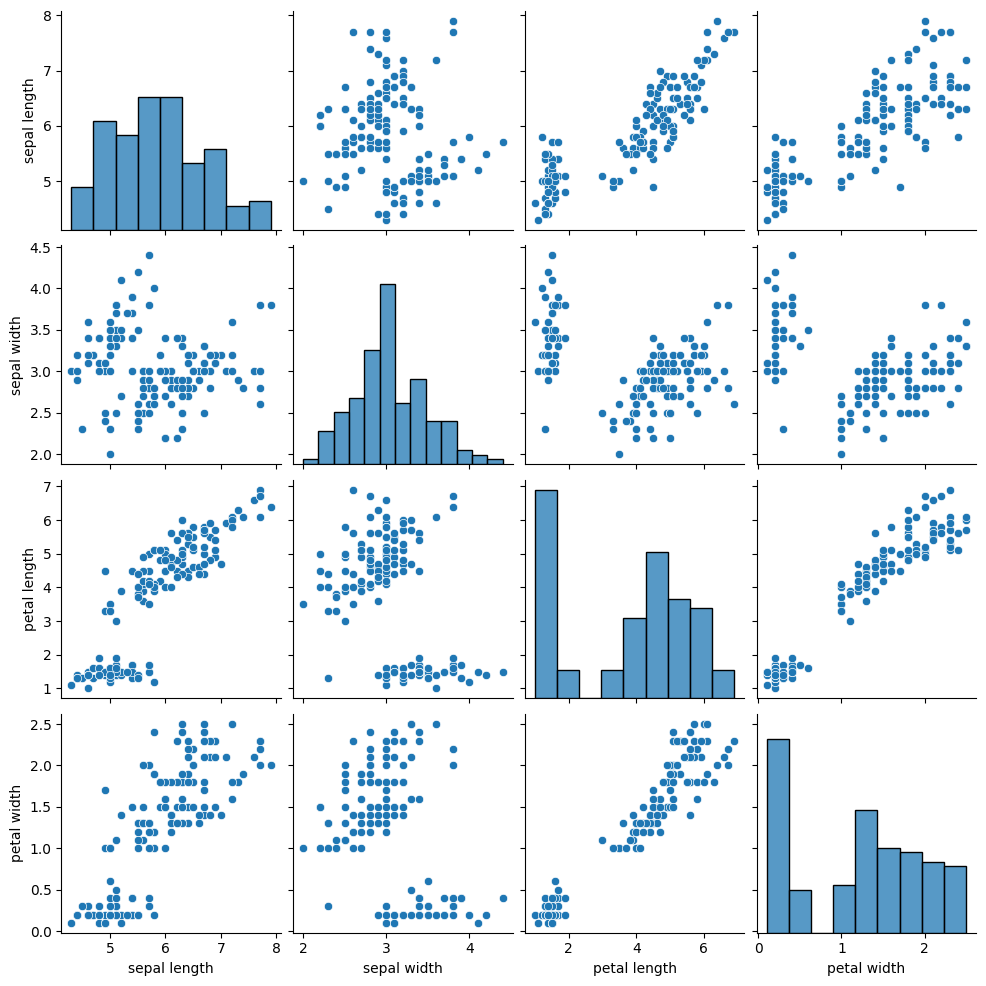

In [ ]:
# prompt: •	Multivariate plots to better understand the relationships between attributes.

import seaborn as sns

sns.pairplot(X)


In [ ]:
# prompt: •	Separate out a validation dataset

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# prompt: •	Set-up the test harness to use 10-fold cross validation

from sklearn.model_selection import KFold
# set up 10-fold cross validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)


In [ ]:
# prompt: •	Build multiple different models to predict species from flower measurements

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

# Train and evaluate models
for name, model in models.items():
  print(f"Training {name}...")
  model.fit(X_train, y_train.values.ravel())
  y_pred = model.predict(X_valid)
  accuracy = accuracy_score(y_valid, y_pred)
  print(f"Accuracy: {accuracy:.4f}\n")


Training Logistic Regression...
Accuracy: 1.0000

Training K-Nearest Neighbors...
Accuracy: 1.0000

Training Decision Tree...
Accuracy: 1.0000

Training Random Forest...
Accuracy: 1.0000

Training Support Vector Machine...
Accuracy: 1.0000



In [ ]:
# prompt: •	Select the best model.
# test 6 different algorithms:
# o	Logistic Regression (LR)
# o	Linear Discriminant Analysis (LDA)
# o	K-Nearest Neighbors (KNN).
# o	Classification and Regression Trees (CART).
# o	Gaussian Naive Bayes (NB).
# o	Support Vector Machines (SVM).

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Classification and Regression Trees": DecisionTreeClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC()
}

# Train and evaluate models
for name, model in models.items():
  print(f"Training {name}...")
  model.fit(X_train, y_train.values.ravel())
  y_pred = model.predict(X_valid)
  accuracy = accuracy_score(y_valid, y_pred)
  print(f"Accuracy: {accuracy:.4f}\n")


Training Logistic Regression...
Accuracy: 1.0000

Training Linear Discriminant Analysis...
Accuracy: 1.0000

Training K-Nearest Neighbors...
Accuracy: 1.0000

Training Classification and Regression Trees...
Accuracy: 1.0000

Training Gaussian Naive Bayes...
Accuracy: 1.0000

Training Support Vector Machine...
Accuracy: 1.0000



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
<ipython-input-32-dcded2a97e27>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X['sepal length'], X['sepal width'], cmap='viridis', label='Original Data')
<ipython-input-32-dcded2a97e27>:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(new_data[:, 0], new_data[:, 1], marker='x', s=100, cmap='viridis', label='Predictions')


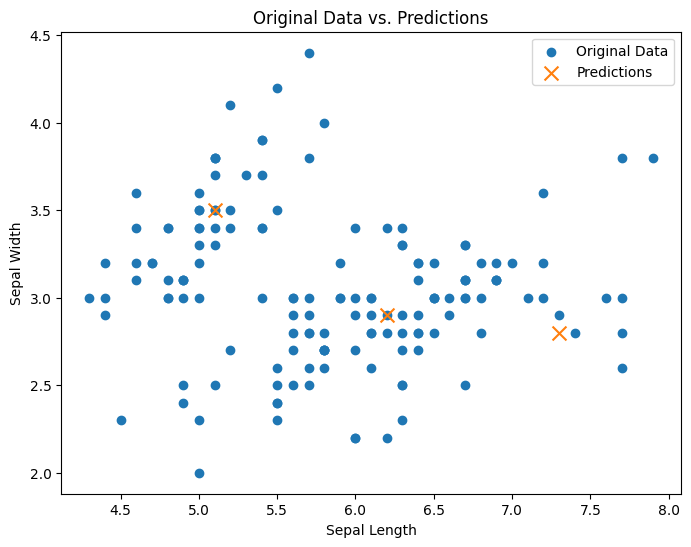

In [ ]:
# prompt: now create some new data and make some predictions on that new data. and try to visualize you predictions with the original answer in a graph or chart if possible

import numpy as np
# Create new data for prediction
new_data = np.array([[5.1, 3.5, 1.4, 0.2],
                     [6.2, 2.9, 4.3, 1.3],
                     [7.3, 2.8, 6.3, 1.8]])

# Make predictions using the trained Random Forest model (you can choose any model)
model = RandomForestClassifier()
model.fit(X_train, y_train.values.ravel())
predictions = model.predict(new_data)

# Visualize predictions
plt.figure(figsize=(8, 6))
plt.scatter(X['sepal length'], X['sepal width'], cmap='viridis', label='Original Data')
plt.scatter(new_data[:, 0], new_data[:, 1], marker='x', s=100, cmap='viridis', label='Predictions')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Original Data vs. Predictions')
plt.legend()
plt.show()
